## <b><i>Apple Stock Price Prediction with LSTM Model</i></b>

In this Jupyter Notebook, we will explore and analyze a dataset containing 10 years of historical stock price data for Apple Inc. The dataset, obtained from Kaggle, spans from 2010 to 2020, providing us with a rich source of information to analyze and predict Apple's stock prices.

### <i>About the Dataset</i>

The dataset contains various attributes related to Apple's stock, including the date, opening price, closing price, high and low prices, volume, and more. We will leverage this historical data to gain insights into Apple's stock market performance and build a predictive model to forecast its future closing prices.

### <i>Objectives</i>

Our primary objectives for this project are as follows:

1. **Data Exploration:** We will start by exploring the dataset to understand its structure and characteristics. This step will involve data visualization, summary statistics, and time series analysis.

2. **Feature Engineering:** We will engineer relevant features and perform data preprocessing to prepare the data for modeling.

3. **LSTM Model for Stock Price Prediction:** We will employ Long Short-Term Memory (LSTM), a type of recurrent neural network (RNN), to create a powerful model for predicting Apple's stock closing prices. LSTMs are well-suited for capturing sequential and temporal patterns in time series data, making them an ideal choice for stock price prediction.

4. **Model Evaluation:** We will evaluate the performance of the LSTM model and assess its ability to predict future closing prices accurately.

5. **Visualization:** To aid our analysis, we will create informative visualizations, such as line charts, bar plots, and more, to showcase the stock price trends and LSTM model predictions.

### <i>Tools and Libraries</i>

We will be using the following tools and libraries throughout this notebook:

- Python
- Jupyter Notebook
- Pandas
- NumPy
- Matplotlib
- Plotly
- Scikit-Learn
- TensorFlow (for LSTM model implementation)



### <i>Import Libraries</i>  

In [106]:
import pandas as pd
import datetime as dt
import numpy as np
import math

from itertools import cycle
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_gamma_deviance, mean_poisson_deviance
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### <i>Data Exploration</i>

In [107]:
# import data using pandas

df = pd.read_csv("stock_data.csv")

df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [108]:
df.shape

(2518, 6)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [140]:
df.describe()

,Close,Volume,Open,High,Low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,114.769522,7.258009e+07,114.728443,115.766415,113.690582
std,60.662405,5.663113e+07,60.546893,61.134456,60.085105
min,29.835700,1.136205e+07,29.392800,29.928600,28.464300
25%,66.822475,3.053026e+07,66.877150,67.475300,66.372950
50%,101.090000,5.295469e+07,101.115000,102.085000,100.350000
75%,154.630000,9.861006e+07,154.610000,155.735000,153.325000
max,327.200000,4.624423e+08,324.740000,327.850000,323.350000


In [111]:
df.dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [112]:
df.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [113]:
# correcting column names
df.rename(columns={' High':'High', ' Low':'Low', ' Close/Last': 'Close', ' Open': 'Open', ' Volume': 'Volume'}, 
          inplace=True)

### <i>EDA</i>

In [114]:
# start date and end date in data

sd = df.iloc[-1][0]
ed = df.iloc[0][0]

print("Starting Date:", sd)
print("Ending date:", ed)

Starting Date: 03/01/2010
Ending date: 02/28/2020


In [115]:
# Convert column values from object to numeric type

df['Date'] = pd.to_datetime(df['Date'])
df[['High', 'Low', 'Close', 'Open']] = df[['High', 'Low', 'Close', 'Open']].apply(lambda x: x.str.replace('[\$,]', '', regex=True)).apply(pd.to_numeric, errors='coerce')

df.head()

,Date,Close,Volume,Open,High,Low
0,2020-02-28,273.36,106721200,257.26,278.41,256.37
1,2020-02-27,273.52,80151380,281.10,286.00,272.96
2,2020-02-26,292.65,49678430,286.53,297.88,286.50
3,2020-02-25,288.08,57668360,300.95,302.53,286.13
4,2020-02-24,298.18,55548830,297.26,304.18,289.23


In [116]:
df.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Open             float64
High             float64
Low              float64
dtype: object

In [117]:
# check for NA values

df.isna().any()

Date      False
Close     False
Volume    False
Open      False
High      False
Low       False
dtype: bool

In [118]:
#top 5 close price

df.sort_values('Close', ascending=False).head()

,Date,Close,Volume,Open,High,Low
11,2020-02-12,327.20,28432570,321.47,327.22,321.4700
15,2020-02-06,325.21,26356390,322.57,325.22,320.2648
9,2020-02-14,324.95,20028450,324.74,325.98,322.8500
10,2020-02-13,324.87,23686890,324.19,326.22,323.3500
21,2020-01-29,324.34,54149930,324.45,327.85,321.3800


In [119]:
# plotting yearly mean of open and close 

yearly_mean = df.groupby(df['Date'].dt.strftime('%Y'))[['Open', 'Close', 'High', 'Low']].mean().reset_index()

fig = px.bar(yearly_mean, x='Date', y=['Open', 'Close'], labels={'Date': 'Year', 'value': 'Mean Price'},
             title='Mean Open and Close Prices by Year')

fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.show()

In [120]:
# plotting yearly mean of high and low

fig = px.bar(yearly_mean, x='Date', y=['High', 'Low'], labels={'Date': 'Year', 'value': 'Mean Price'},
             title='Mean High and Low Prices by Year')

fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.show()

In [121]:
# plotting overall stock analysis over the years

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(yearly_mean, x='Date', y=['Open', 'Close', 'High', 'Low'], labels={'Date': 'Year','value':'Stock value'})

fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',
                  legend_title_text='Stock Parameters')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [122]:
# plotting mean close price by year 

fig = px.line(yearly_mean, x='Date', y='Close', labels={'Date':'Year','close':'Close Stock'})

fig.update_traces(marker_line_width=2, opacity=0.8)

fig.update_layout(title_text='Apple Inc. Close Price for Time Period 2010-2020', plot_bgcolor='white', 
                  font_size=15, font_color='black')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### <i>Feature Engineering</i>

In [123]:
close_df = df[['Close']]
print("Shape of close_df is", close_df.shape)

Shape of close_df is (2518, 1)


In [124]:
close_df

,Close
0,273.3600
1,273.5200
2,292.6500
3,288.0800
4,298.1800
...,...
2513,31.2786
2514,30.1014
2515,29.9043
2516,29.8357


In [125]:
# normalizing using MinMax Scaler

scaler = MinMaxScaler()

close_price = close_df.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
scaled_close.shape

(2518, 1)

In [126]:
# Determine the split point as a percentage (e.g., 60% training, 40% testing)

split_percentage = 0.6
split_index = int(split_percentage * len(scaled_close))
train_data, test_data = scaled_close[0:split_index], scaled_close[split_index:len(scaled_close)]

print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)

Train data:  (1510, 1)
Test data:  (1008, 1)


In [127]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [128]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1494, 15)
y_train:  (1494,)
X_test:  (992, 15)
y_test (992,)


In [129]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1494, 15, 1)
X_test:  (992, 15, 1)


### <i>LSTM Model</i>

In [130]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [131]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200


47/47 [==============================] - 2s 11ms/step - loss: 0.0967 - val_loss: 0.0108
Epoch 2/200
47/47 [==============================] - 0s 7ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 3/200
47/47 [==============================] - 0s 7ms/step - loss: 3.3977e-04 - val_loss: 3.7648e-04
Epoch 4/200
47/47 [==============================] - 0s 7ms/step - loss: 2.5951e-04 - val_loss: 3.6860e-04
Epoch 5/200
47/47 [==============================] - 0s 7ms/step - loss: 2.4263e-04 - val_loss: 2.3701e-04
Epoch 6/200
47/47 [==============================] - 0s 7ms/step - loss: 2.4512e-04 - val_loss: 1.8689e-04
Epoch 7/200
47/47 [==============================] - 0s 7ms/step - loss: 2.3733e-04 - val_loss: 1.4196e-04
Epoch 8/200
47/47 [==============================] - 0s 7ms/step - loss: 2.3236e-04 - val_loss: 2.0329e-04
Epoch 9/200
47/47 [==============================] - 0s 7ms/step - loss: 2.2980e-04 - val_loss: 1.1257e-04
Epoch 10/200
47/47 [==============================] - 0s 7ms/ste

### <i>Model Evaluation</i>

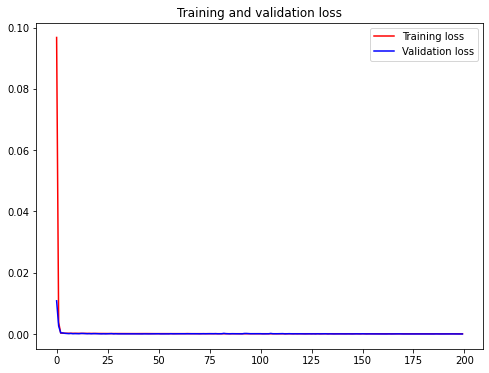

In [132]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [133]:
### Prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict.shape, test_predict.shape

31/31 [==============================] - 0s 3ms/step


((1494, 1), (992, 1))

In [134]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [135]:
# Evaluation metrics RMSE and MAE

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))

print("-------------------------------------------------------------------------------------")

print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2.8298090699836087
Train data MSE:  8.007819372561498
Train data MAE:  2.0271482842176
-------------------------------------------------------------------------------------
Test data RMSE:  1.3627884658003244
Test data MSE:  1.857192402518402
Test data MAE:  0.9976173126066883


In [136]:
# Variance Regression Score

print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9974507915575409
Test data explained variance regression score: 0.9939082871616404


In [137]:
# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))

print("----------------------------------------------------------------------")

print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0003391515998741806
Test data MGD:  0.00047319483751225694
----------------------------------------------------------------------
Train data MPD:  0.04948958531052483
Test data MPD:  0.028443013581899487


### <i>Visualization</i>

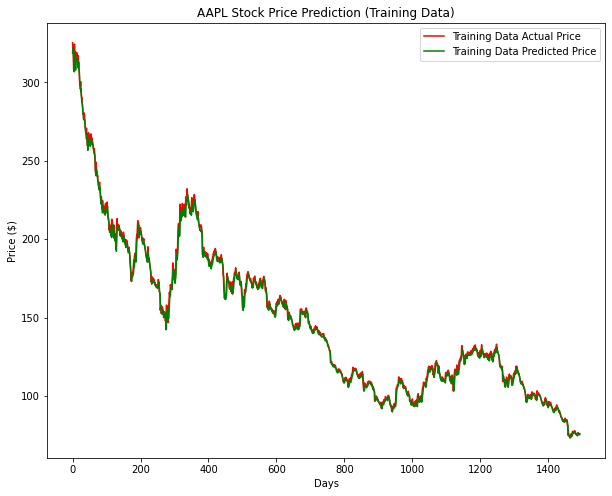

In [138]:
# plot of training prediction against actual data

plt.figure(figsize=(10, 8))
plt.plot(original_ytrain, label='Training Data Actual Price', color='red')
plt.plot(train_predict, label='Training Data Predicted Price', color='green')
 
plt.title('AAPL Stock Price Prediction (Training Data)')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show();

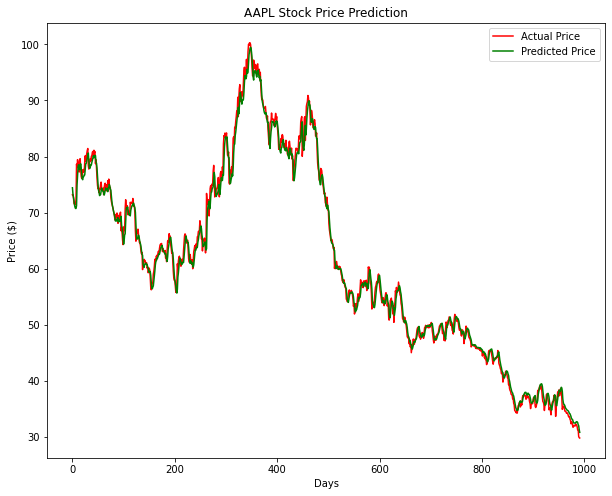

In [139]:
# plot of prediction against actual data

plt.figure(figsize=(10, 8))
plt.plot(original_ytest, label='Actual Price', color='red')
plt.plot(test_predict, label='Predicted Price', color='green')
 
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show();

###  <i>Conclusion</i>


- This univariate LSTM model effectively learned from ten years of Apple stock price data, demonstrating strong training performance.

- The model showcased promising generalization to unseen data, indicated by low error metrics (RMSE, MSE, MAE, MGD, and MPD).

- While the model's performance is encouraging, further refinements and feature engineering may enhance its predictive accuracy.

- Considering domain-specific requirements, this model offers valuable insights and potential for practical stock price forecasting.
